<a href="https://colab.research.google.com/github/Abinash023/Car-Sales/blob/main/CarSales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
carsales = pd.read_csv('Car_sales.csv')

In [3]:
carsales

,Manufacturer,Model,Sales_k,Resale_value_4yrs,VehicleType,Price,EngineSize,Horsepower,Wheelbase,Width,Length,CurbWeight,FuelCapacity,FuelEfficiency,LatestLaunch
0,Acura,Integra,16.919,16.36,Passenger,21.5,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2-Feb-14
1,Acura,TL,39.384,19.875,Passenger,28.4,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6-Mar-15
2,Acura,CL,14.114,18.225,Passenger,.,3.2,225,106.9,70.6,192,3.47,17.2,26,1-Apr-14
3,Acura,RL,8.588,29.725,Passenger,42,3.5,210,114.6,71.4,196.6,3.85,18,22,3-Oct-15
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178,2.998,16.4,27,10-Aug-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,.,Passenger,24.4,1.9,160,100.5,67.6,176.6,3.042,15.8,25,21-Sep-15
153,Volvo,S70,15.245,.,Passenger,27.5,2.4,168,104.9,69.3,185.9,3.208,17.9,25,24-Nov-14
154,Volvo,V70,17.531,.,Passenger,28.8,2.4,168,104.9,69.3,186.2,3.259,17.9,25,25-Jun-15
155,Volvo,C70,3.493,.,Passenger,45.5,2.3,236,104.9,71.5,185.7,3.601,18.5,23,26-Apr-15


In [4]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Manufacturer       157 non-null    object 
 1   Model              157 non-null    object 
 2   Sales_k            157 non-null    float64
 3   Resale_value_4yrs  157 non-null    object 
 4   VehicleType        157 non-null    object 
 5   Price              157 non-null    object 
 6   EngineSize         157 non-null    object 
 7   Horsepower         157 non-null    object 
 8   Wheelbase          157 non-null    object 
 9   Width              157 non-null    object 
 10  Length             157 non-null    object 
 11  CurbWeight         157 non-null    object 
 12  FuelCapacity       157 non-null    object 
 13  FuelEfficiency     157 non-null    object 
 14  LatestLaunch       157 non-null    object 
dtypes: float64(1), object(14)
memory usage: 18.5+ KB


In [5]:
carsales.drop(['Manufacturer', 'Model','LatestLaunch'], axis=1, inplace=True)

In [6]:
carsales['VehicleType'].replace(['Passenger','Car'],[1,2],inplace=True)

In [7]:
carsales["Resale_value_4yrs"] = pd.to_numeric(carsales.Resale_value_4yrs, errors='coerce')
carsales["Price"] = pd.to_numeric(carsales.Price, errors='coerce')
carsales["EngineSize"] = pd.to_numeric(carsales.EngineSize, errors='coerce')
carsales["Horsepower"] = pd.to_numeric(carsales.Horsepower, errors='coerce')
carsales["Wheelbase"] = pd.to_numeric(carsales.Wheelbase, errors='coerce')
carsales["Width"] = pd.to_numeric(carsales.Width, errors='coerce')
carsales["Length"] = pd.to_numeric(carsales.Length, errors='coerce')
carsales["CurbWeight"] = pd.to_numeric(carsales.CurbWeight, errors='coerce')
carsales["FuelCapacity"] = pd.to_numeric(carsales.FuelCapacity, errors='coerce')
carsales["FuelEfficiency"] = pd.to_numeric(carsales.FuelEfficiency, errors='coerce')

In [8]:
carsales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_k            157 non-null    float64
 1   Resale_value_4yrs  121 non-null    float64
 2   VehicleType        157 non-null    int64  
 3   Price              155 non-null    float64
 4   EngineSize         156 non-null    float64
 5   Horsepower         156 non-null    float64
 6   Wheelbase          156 non-null    float64
 7   Width              156 non-null    float64
 8   Length             156 non-null    float64
 9   CurbWeight         155 non-null    float64
 10  FuelCapacity       156 non-null    float64
 11  FuelEfficiency     154 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 14.8 KB


In [9]:
carsales.isnull().sum()

Sales_k               0
Resale_value_4yrs    36
VehicleType           0
Price                 2
EngineSize            1
Horsepower            1
Wheelbase             1
Width                 1
Length                1
CurbWeight            2
FuelCapacity          1
FuelEfficiency        3
dtype: int64

In [10]:
carsales.describe()

,Sales_k,Resale_value_4yrs,VehicleType,Price,EngineSize,Horsepower,Wheelbase,Width,Length,CurbWeight,FuelCapacity,FuelEfficiency
count,157.000000,121.000000,157.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000
mean,52.998076,18.072975,1.261146,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156
std,68.029422,11.453384,0.440665,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706
min,0.110000,5.160000,1.000000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000
25%,14.114000,11.260000,1.000000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000
50%,29.450000,14.180000,1.000000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000
75%,67.956000,19.875000,2.000000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000
max,540.561000,67.550000,2.000000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000


In [11]:
carsales.corr()

,Sales_k,Resale_value_4yrs,VehicleType,Price,EngineSize,Horsepower,Wheelbase,Width,Length,CurbWeight,FuelCapacity,FuelEfficiency
Sales_k,1.000000,-0.279034,0.242183,-0.304734,0.019983,-0.197756,0.358179,0.140918,0.254980,0.008628,0.086540,-0.016764
Resale_value_4yrs,-0.279034,1.000000,-0.089360,0.953840,0.531330,0.769081,-0.052270,0.178767,0.026548,0.361557,0.325567,-0.399880
VehicleType,0.242183,-0.089360,1.000000,-0.044145,0.258902,0.004689,0.388009,0.246183,0.135259,0.522773,0.597469,-0.575056
Price,-0.304734,0.953840,-0.044145,1.000000,0.626875,0.839744,0.110513,0.329136,0.156935,0.526224,0.423282,-0.492157
EngineSize,0.019983,0.531330,0.258902,0.626875,1.000000,0.837360,0.472130,0.690398,0.541424,0.760043,0.663022,-0.734622
Horsepower,-0.197756,0.769081,0.004689,0.839744,0.837360,1.000000,0.286308,0.539158,0.393364,0.610131,0.499907,-0.611332
Wheelbase,0.358179,-0.052270,0.388009,0.110513,0.472130,0.286308,1.000000,0.683135,0.839639,0.651016,0.654044,-0.497931
Width,0.140918,0.178767,0.246183,0.329136,0.690398,0.539158,0.683135,1.000000,0.710435,0.720927,0.656302,-0.602546
Length,0.254980,0.026548,0.135259,0.156935,0.541424,0.393364,0.839639,0.710435,1.000000,0.627163,0.563540,-0.446756
CurbWeight,0.008628,0.361557,0.522773,0.526224,0.760043,0.610131,0.651016,0.720927,0.627163,1.000000,0.863968,-0.818402


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

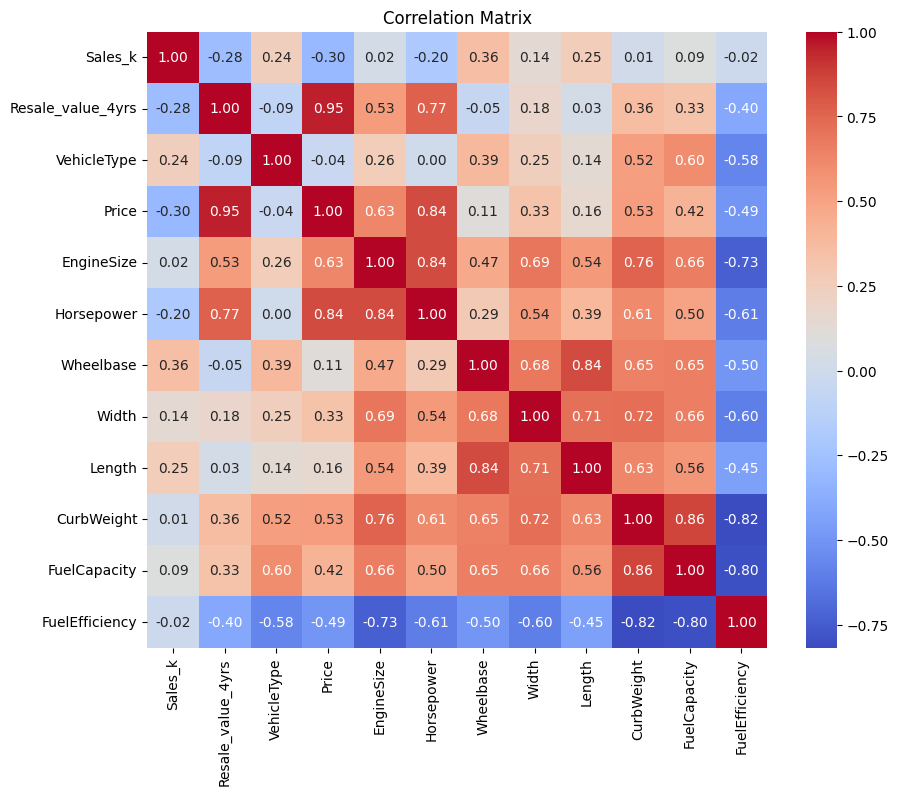

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(carsales.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
carsales['Resale_value_4yrs']=carsales['Resale_value_4yrs'].fillna(carsales['Resale_value_4yrs'].mean())
carsales['Price']=carsales['Price'].fillna(carsales['Price'].mean())
carsales['EngineSize']=carsales['EngineSize'].fillna(carsales['EngineSize'].mean())
carsales['Horsepower']=carsales['Horsepower'].fillna(carsales['Horsepower'].mean())
carsales['Wheelbase']=carsales['Wheelbase'].fillna(carsales['Wheelbase'].mean())
carsales['Width']=carsales['Width'].fillna(carsales['Width'].mean())
carsales['Length']=carsales['Length'].fillna(carsales['Length'].mean())
carsales['CurbWeight']=carsales['CurbWeight'].fillna(carsales['CurbWeight'].mean())
carsales['FuelCapacity']=carsales['FuelCapacity'].fillna(carsales['FuelCapacity'].mean())
carsales['FuelEfficiency']=carsales['FuelEfficiency'].fillna(carsales['FuelEfficiency'].mean())

In [15]:
carsales

,Sales_k,Resale_value_4yrs,VehicleType,Price,EngineSize,Horsepower,Wheelbase,Width,Length,CurbWeight,FuelCapacity,FuelEfficiency
0,16.919,16.360000,1,21.500000,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0
1,39.384,19.875000,1,28.400000,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0
2,14.114,18.225000,1,27.390755,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0
3,8.588,29.725000,1,42.000000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0
4,20.397,22.255000,1,23.990000,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...
152,3.545,18.072975,1,24.400000,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0
153,15.245,18.072975,1,27.500000,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0
154,17.531,18.072975,1,28.800000,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0
155,3.493,18.072975,1,45.500000,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0


In [16]:
carsales.to_csv('newcarsales.csv', index=False)